### Decision Trees  

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [37]:
df = pd.read_csv('../data/Iris.csv')
df= data.rename(index=str, columns={"Species": "Class"})

In [38]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df['Class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

In [40]:
#sns.pairplot(df,hue='Class',palette='Set2')

In [50]:
features_ = df.drop(['Class','Id'],axis=1).values
class_ = df['Class'].values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_, class_, test_size=0.3, random_state=1) 

In [52]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1986, criterion='gini', max_depth=5)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1986,
            splitter='best')

#### avaliando o algoritmo com validação cruzada

In [53]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_dt, features_, class_, scoring='accuracy', cv=10)
print(scores_dt.mean())

0.9533333333333334


In [45]:
y_pred = classifier_dt.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 

In [47]:
print(classification_report(y_test,y_pred))
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

      micro avg       0.96      0.96      0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Decision Tree model accuracy(in %): 95.55555555555556
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [48]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[1:5])
print(features)
target_names_iris = ['setosa', 'versicolor', 'virginica']
np.asarray(target_names_iris)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

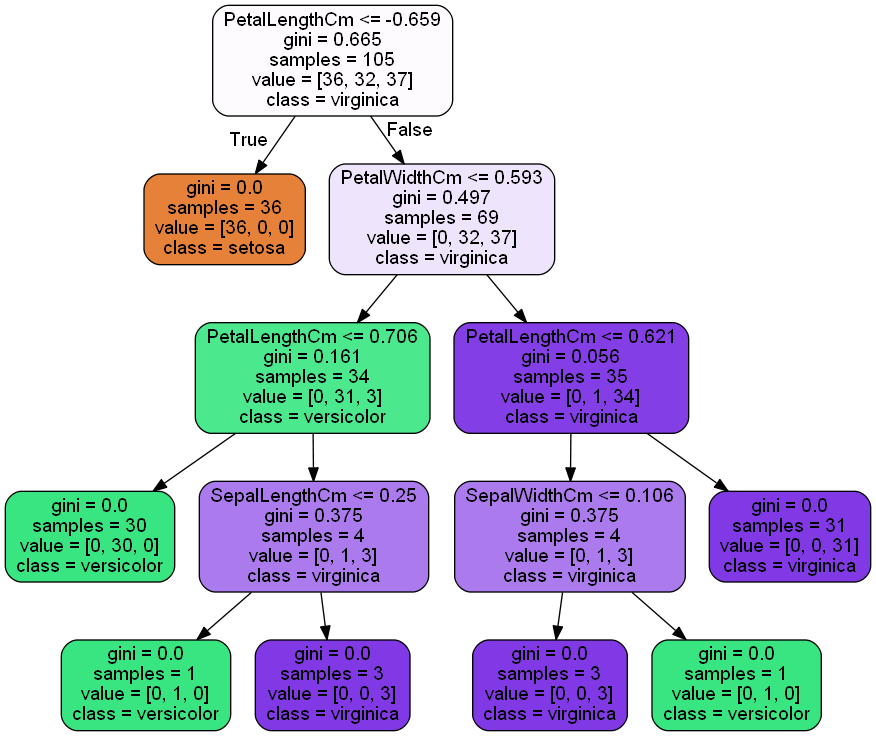

In [49]:
dot_data = StringIO()  
export_graphviz(classifier_dt, out_file=dot_data,feature_names=features, class_names= target_names_iris ,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [87]:
# Exemplo  utilizado para validar o modelo
sample1 = [5.1, 3.5, 1.4, 0.2]  # Iris-setosa
sample2 = [7.0, 3.2, 4.7, 1.4]   # Iris-versicolor
sample3 = [6.9, 3.2, 5.7, 2.3]     # Iris-virginica

classifier_dt.predict([sample1, sample2, sample3])  # Predizendo o tipo da flor

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)